 Logistic Regression with PyTorch. We will mostly see how to use Pytorch rather than numpy that we used in the previous 2 chapters. Pytorch has similar functionality and commands. The type of variable in pytorch is tensor compared to arrays in numpy.

In [ ]:
import torch
import matplotlib.pyplot as plt
from IPython import display
import time
# let’s make the same dataset which we constructed at the start of chapter 2, but this time, in PyTorch.
X = torch.cat((torch.arange(15, dtype=float), torch.arange(20, 35, dtype=float)), axis=0)
y = torch.cat((torch.zeros(15, dtype=float), torch.ones(15, dtype=float)), axis=0)

Let’s continue rewriting our code from chapter 2, but using PyTorch instead.

In [ ]:
def BCE(y, y_pred): ##log loss error (binary cross entropy)
  return -torch.sum((y*torch.log(y_pred) + (1-y)*torch.log(1-y_pred)))/y.shape[0]

<Figure size 432x288 with 0 Axes>

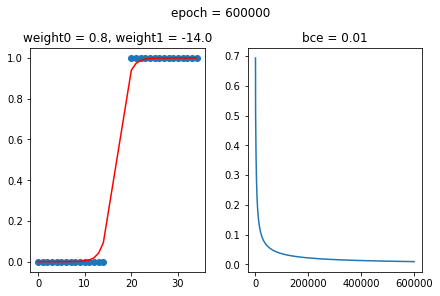

In [ ]:
epoch_loss = []

weights = torch.tensor([0., 0.])
learning_rate = 1e-4
n = X.shape[0]

for epoch in range(600000+1): 
    linear = weights[0]*X + weights[1]
    y_pred = 1/(1+torch.exp(-linear))
    loss = BCE(y, y_pred)
    epoch_loss.append(loss)


    if(epoch%50000 == 0):
        ######demo purpose only#####
        display.display(plt.gcf())
        display.clear_output(wait=True)
        ##########plotting##########
        fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
        fig.suptitle('epoch = {0}'.format(epoch))
        ax0.scatter(X, y)
        ax0.plot(X, y_pred, 'r')
        ax0.set_title('weight0 = {0:.1f}, weight1 = {1:.1f}'.format(weights[0], weights[1]))
        ax1.set_title('bce = {0:.2f}'.format(loss))
        ax1.plot(epoch_loss)
        plt.show()
        time.sleep(1)
        ############################
    
    ###simplified slope and bias derivatives with respect to loss###  
    D_mse_wrt_slope = torch.sum(X * (y - y_pred))
    D_mse_wrt_bias = torch.sum(y - y_pred)
    ###########

    weights[0] += learning_rate * D_mse_wrt_slope
    weights[1] += learning_rate * D_mse_wrt_bias

You might feel like the above code is different. But we can show that there is a fundamental difference between pytorch and numpy. In pytorch, we don't have to deal with derivatives. It takes care of it by using gradient descents which is a numerical algorithm to minimization rather than analytical solution to the derivatives of a function. The relevance of which is important for high dimensional complicated data sets.

Let's see how it works

<Figure size 432x288 with 0 Axes>

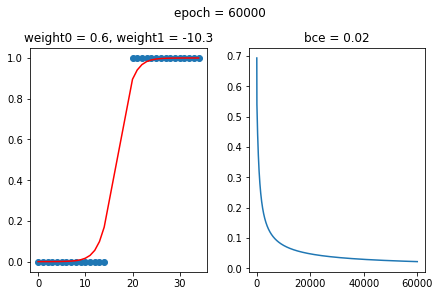

In [ ]:
epoch_loss = []

weights = torch.tensor([0., 0.], requires_grad=True)
learning_rate = 1e-2
n = X.shape[0]

for epoch in range(60000+1):
    linear = weights[0]*X + weights[1]
    y_pred = 1/(1+torch.exp(-linear))
    loss = BCE(y, y_pred)
    epoch_loss.append(loss.item())


    if(epoch%5000 == 0):
        ######demo purpose only#####
        display.display(plt.gcf())
        display.clear_output(wait=True)
        ##########plotting##########
        fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
        fig.suptitle('epoch = {0}'.format(epoch))
        ax0.scatter(X, y)
        ax0.plot(X, y_pred.detach().numpy(), 'r')
        ax0.set_title('weight0 = {0:.1f}, weight1 = {1:.1f}'.format(weights[0], weights[1]))
        ax1.set_title('bce = {0:.2f}'.format(loss))
        ax1.plot(epoch_loss)
        plt.show()
        time.sleep(1)
        ############################

    ###autograd in action###
    loss.backward()

    with torch.no_grad():
        weights -= learning_rate * weights.grad
        
    weights.grad.zero_()

Three fundamental differences between the twoe methods.

1.  The *_grad parameter of the tensor lets PyTorch know that the values in that tensor are those which need to be changed, so that our logistic regression can give us the optimal BCE.
2.  When you use PyTorch’s built-in functionality (e.g., autograd), the code is optimized and actually runs faster than writing things from scratch. Can be seen from high learning rate and low epochs.
1. Replaced our formulae derived via calculus with the line loss.backward(). That 1 line represents backpropagation. The one line code tells PyTorch that we’re looking for the derivatives of the weights (i.e., slope and bias) with respect to our loss (which in this case is BCE)





